In [2]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

[Game Analytics](https://books.google.com/books?id=-guHadEPrFcC&lpg=PA227&ots=lUgpjhl2LI&dq=normalize%20player%20stats%20for%20minutes%20playtime&pg=PA227#v=onepage&q=normalize%20player%20stats%20for%20minutes%20playtime&f=false)

Game Analytics: Maximizing the Value of Player Data
edited by Magy Seif El-Nasr, Anders Drachen, Alessandro Canossa

[what is game telemetry](http://www.gameanalytics.com/blog/what-is-game-telemetry.html)

In [3]:
sys.path.append("../radarchart/")
from radarchart import RadarChart

In [4]:
sys.path.append("../utils/")
from utils import r6io, sample_nrows

In [5]:
pd.options.display.float_format = '{:.2f}'.format

In [6]:
df = r6io.read_player_csv('../data/leaderboard-pages.csv', 'ps4', 'ranked')
df = sample_nrows(df, n=5000)
df = df.reset_index()
NUMBERS = df.columns[(df.columns.str.startswith('stats.')) & (df.columns.str.endswith('has_played')==False)]

In [7]:
print df.shape
df.dtypes

(5000, 26)


index                                             int64
updated_at                               datetime64[ns]
platform                                         object
ubisoft_id                                       object
username                                         object
stats.ranked.has_played                            bool
stats.overall.assists                           float64
stats.overall.barricades_built                  float64
stats.overall.bullets_fired                     float64
stats.overall.bullets_hit                       float64
stats.overall.headshots                         float64
stats.overall.melee_kills                       float64
stats.overall.penetration_kills                 float64
stats.overall.reinforcements_deployed           float64
stats.overall.revives                           float64
stats.overall.steps_moved                       float64
stats.overall.suicides                          float64
stats.progression.level                         

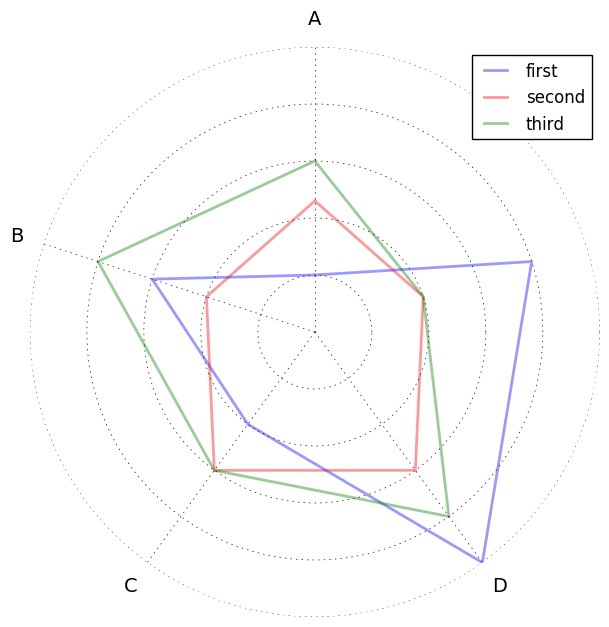

In [8]:
radar = RadarChart(plt.figure(figsize=(6, 6)), ['A','B','C','D', 'E'])
radar.plot([1, 3, 2, 5, 4],  "-", lw=2, color="b", alpha=0.4, label="first")
radar.plot([2.3, 2, 3, 3, 2],"-", lw=2, color="r", alpha=0.4, label="second")
radar.plot([3, 4, 3, 4, 2], "-", lw=2, color="g", alpha=0.4, label="third")
radar.show()

In [20]:
df.head(1).T

,0
index,534548
updated_at,2017-03-16 21:23:51.066000
platform,ps4
ubisoft_id,f3ef8ee0-c12d-40ee-bc71-7cdc15fe6cce
username,vitorcc09
stats.ranked.has_played,True
stats.overall.assists,1721.00
stats.overall.barricades_built,2168.00
stats.overall.bullets_fired,250405.00
stats.overall.bullets_hit,49192.00


In [58]:
def prep_row_for_radar(row, columns):
    return sum([val for val in row.ix[columns].values.tolist()], [])

In [74]:
row = pd.DataFrame(df.ix[0])
columns = ['stats.ranked.wlr', 'stats.ranked.kd']
values = prep_row_for_radar(row, columns)
columns = columns + ['fake1', 'fake2']
values = values + [1.2, 1.7]

In [75]:
print columns
print values

['stats.ranked.wlr', 'stats.ranked.kd', 'fake1', 'fake2']
[1.1340000000000001, 1.0649999999999999, 1.2, 1.7]


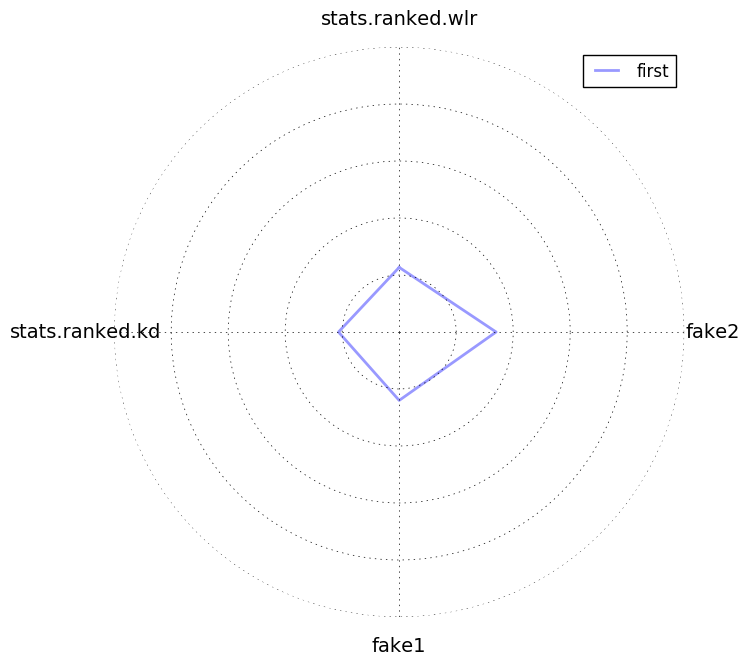

In [76]:
radar = RadarChart(plt.figure(figsize=(6, 6)), columns)
radar.plot(values,  "-", lw=2, color="b", alpha=0.4, label="first")
radar.show()